<a href="https://www.kaggle.com/code/elnazabbasifar/heart-disease-prediction-using-lasso-regression?scriptVersionId=151202163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Heart Disease Prediction

This notebook explores and predicts heart disease using the Heart Disease UCI dataset. The dataset contains 76 attributes, and the target variable indicates the presence of heart disease (0 = no disease, 1 = disease).

### Import Libraries

Let's start by importing the necessary libraries for data manipulation, visualization, and modeling.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.neighbors import LocalOutlierFactor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
# data preprocessing
from sklearn.preprocessing import StandardScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Import Dataset
Load the Heart Disease UCI dataset from a CSV file.

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

### Data Exploration
Let's explore the dataset to gain insights and understand the data.

In [3]:
# Display the first few rows of the dataset
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
# Summary statistics of the dataset
df.describe()

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [5]:
# Information about the dataset (data types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Column names
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# Shape of the dataset
df.shape

(1025, 14)

In [8]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Correlation Plot
Visualize the correlation between features using a clustermap.

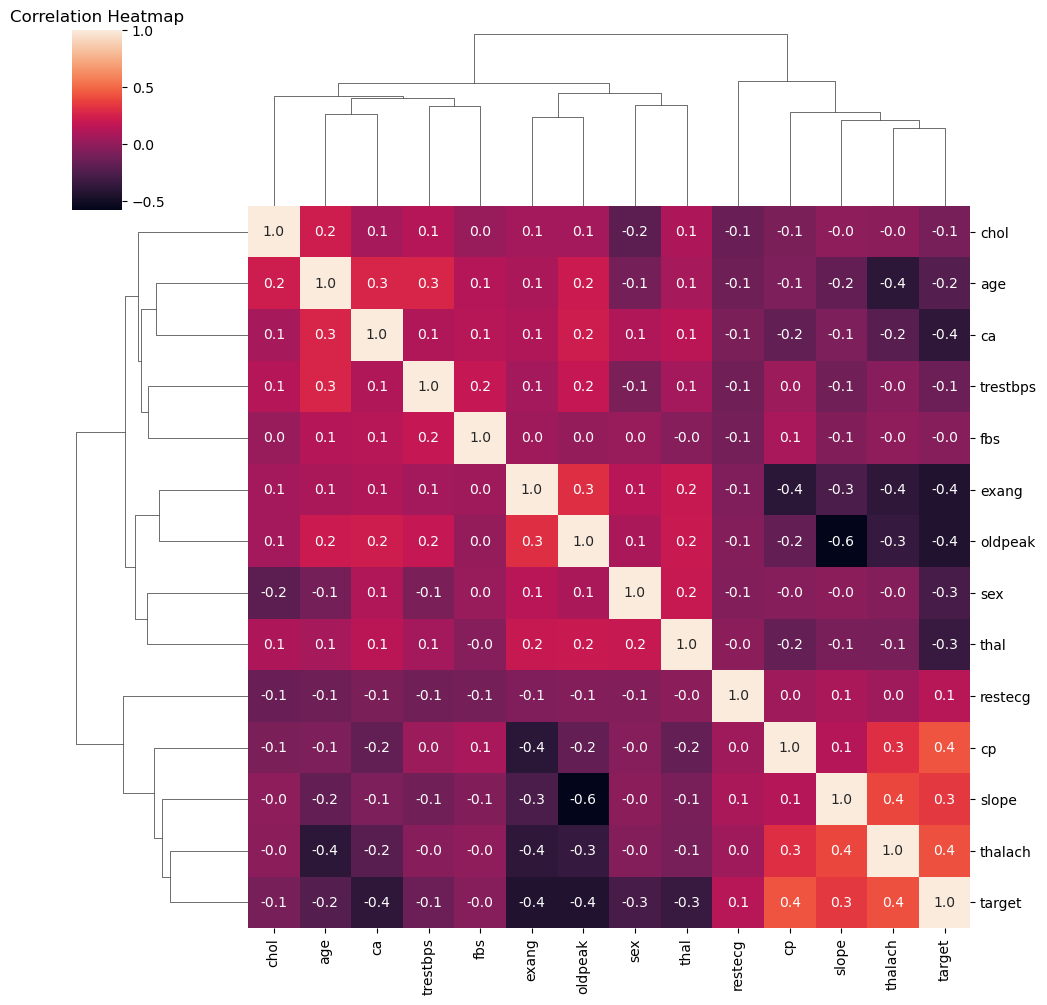

In [9]:
sns.clustermap(df.corr(), annot=True, fmt='.1f')
plt.title("Correlation Heatmap")
plt.show()

### KDE Plot
Examine data distribution with KDE (Kernel Density Estimation) plot for a smooth view of probability density.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


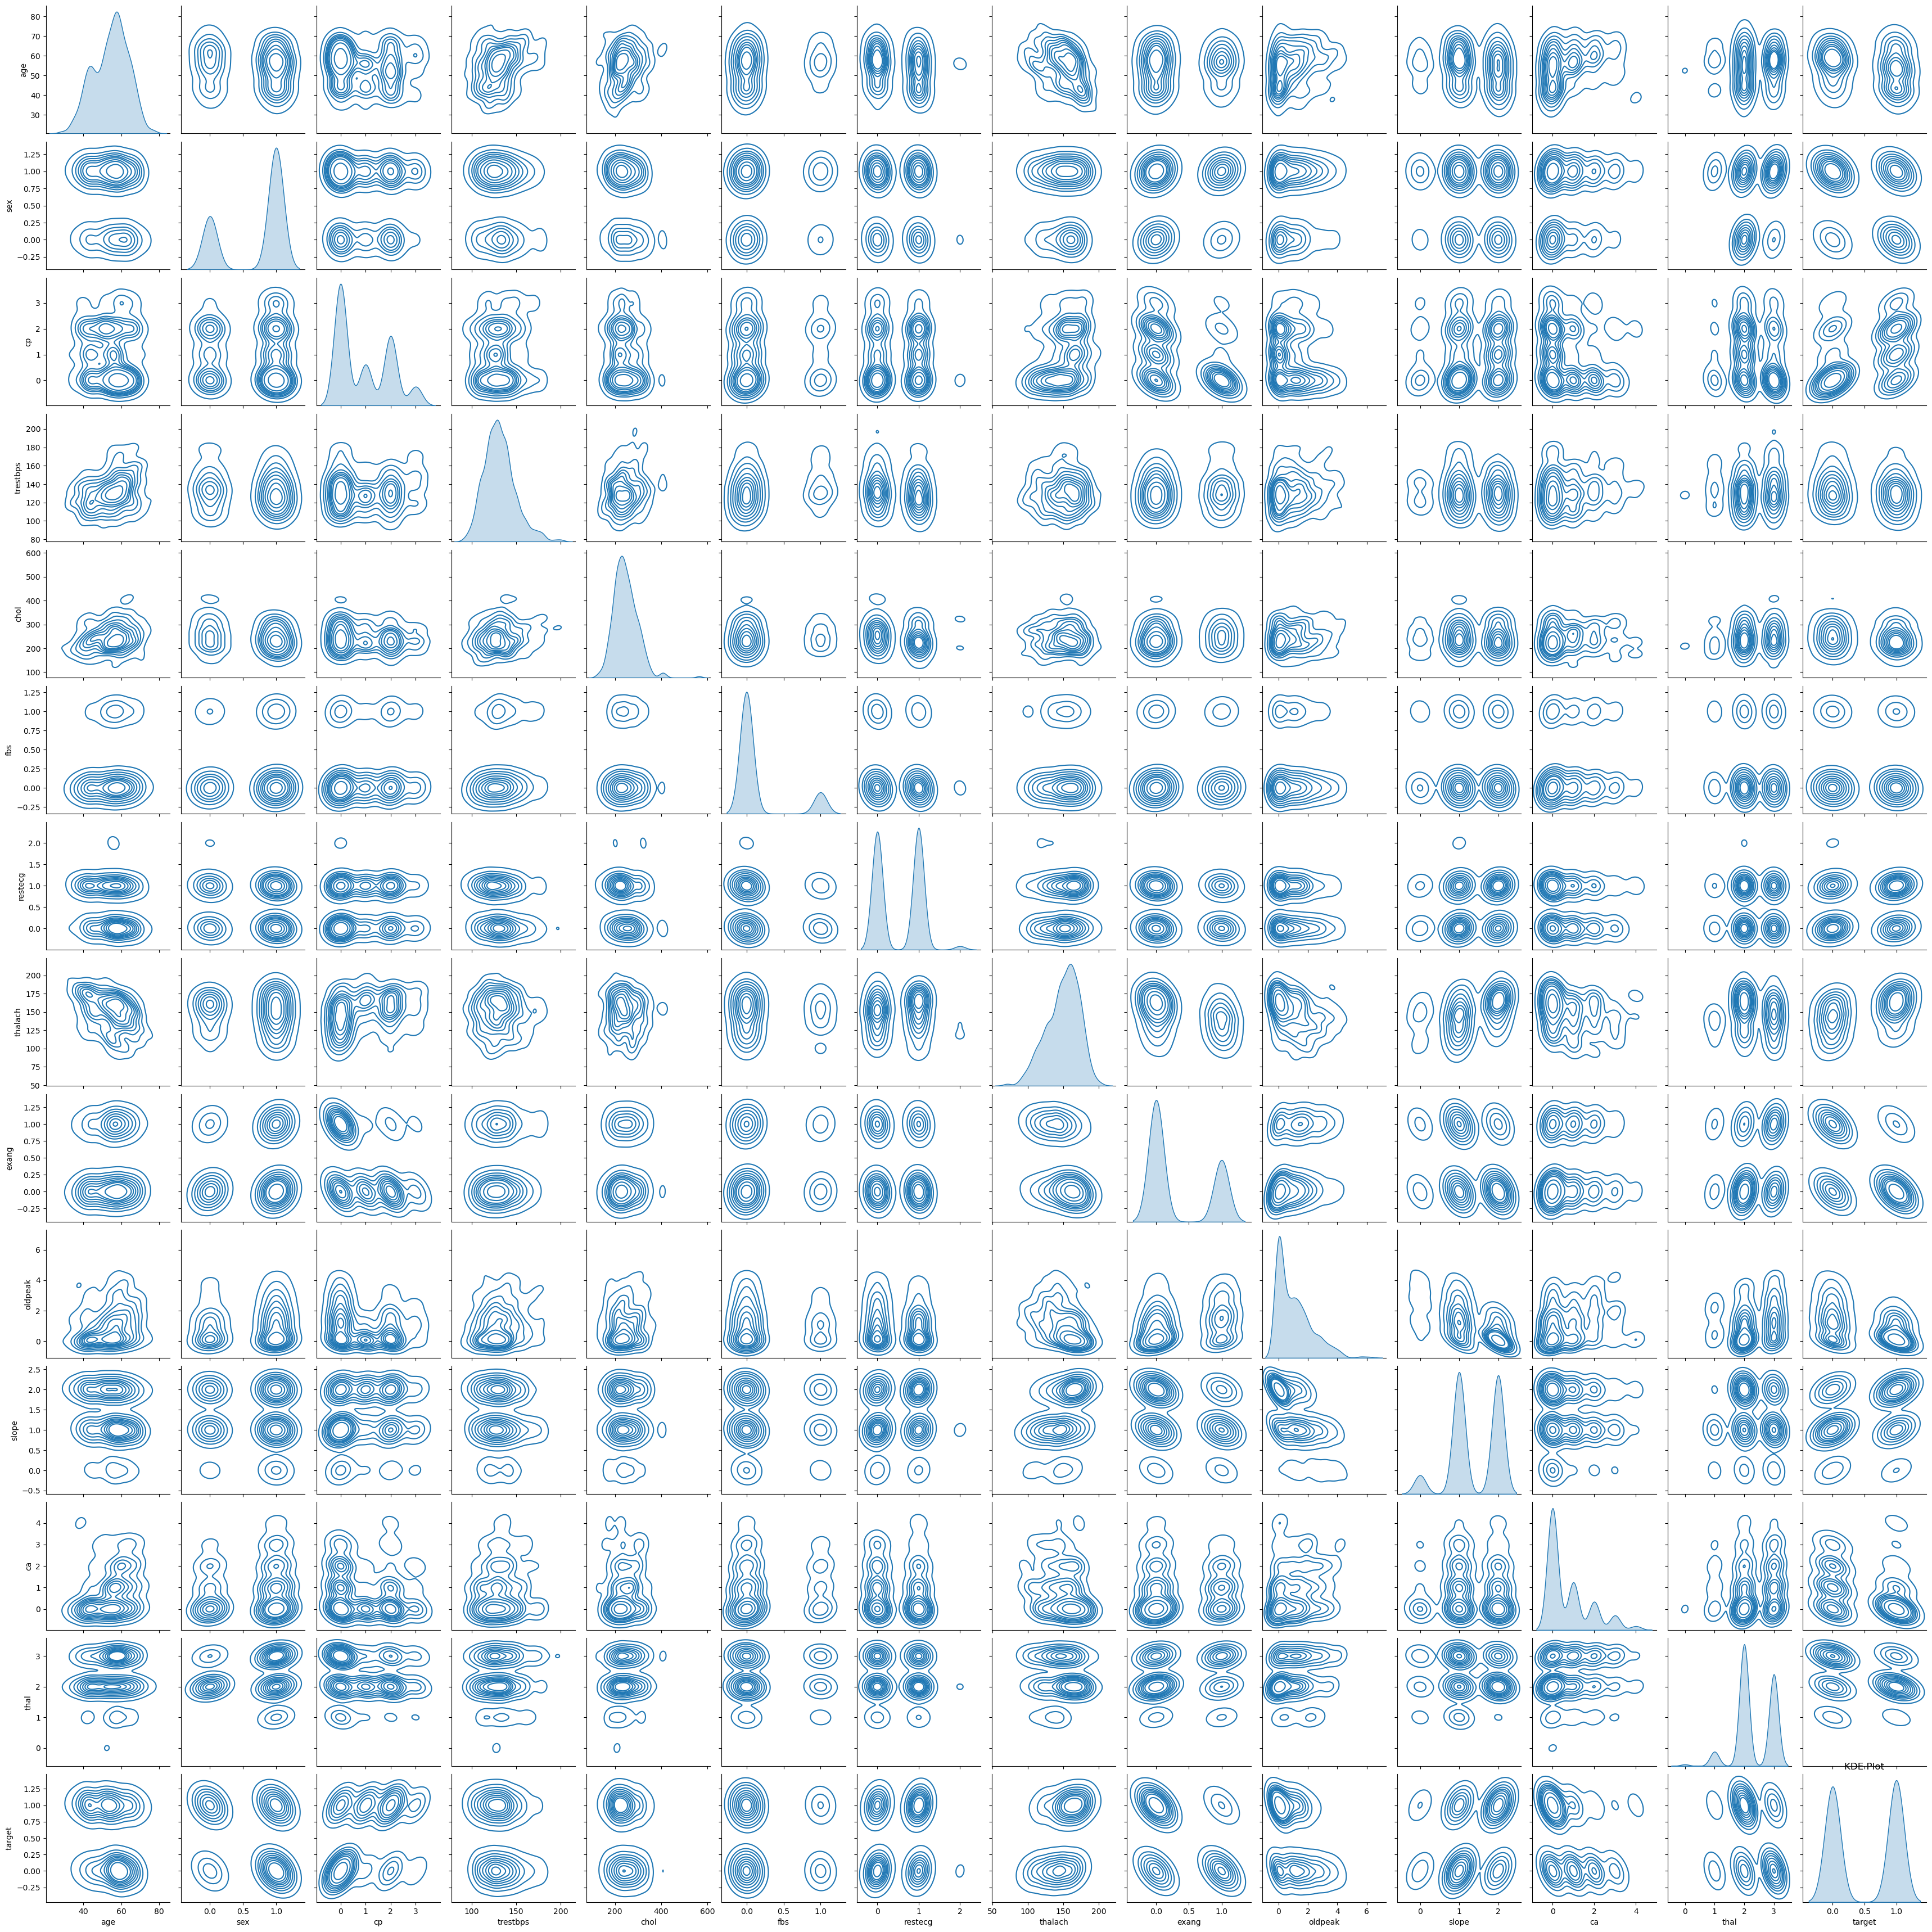

In [10]:
sns.pairplot(df, kind="kde")
plt.title("KDE Plot")
plt.show()

### Boxplot
Visualize the distribution of each feature using boxplots to gain insights into the central tendency, spread, and potential outliers within the dataset.

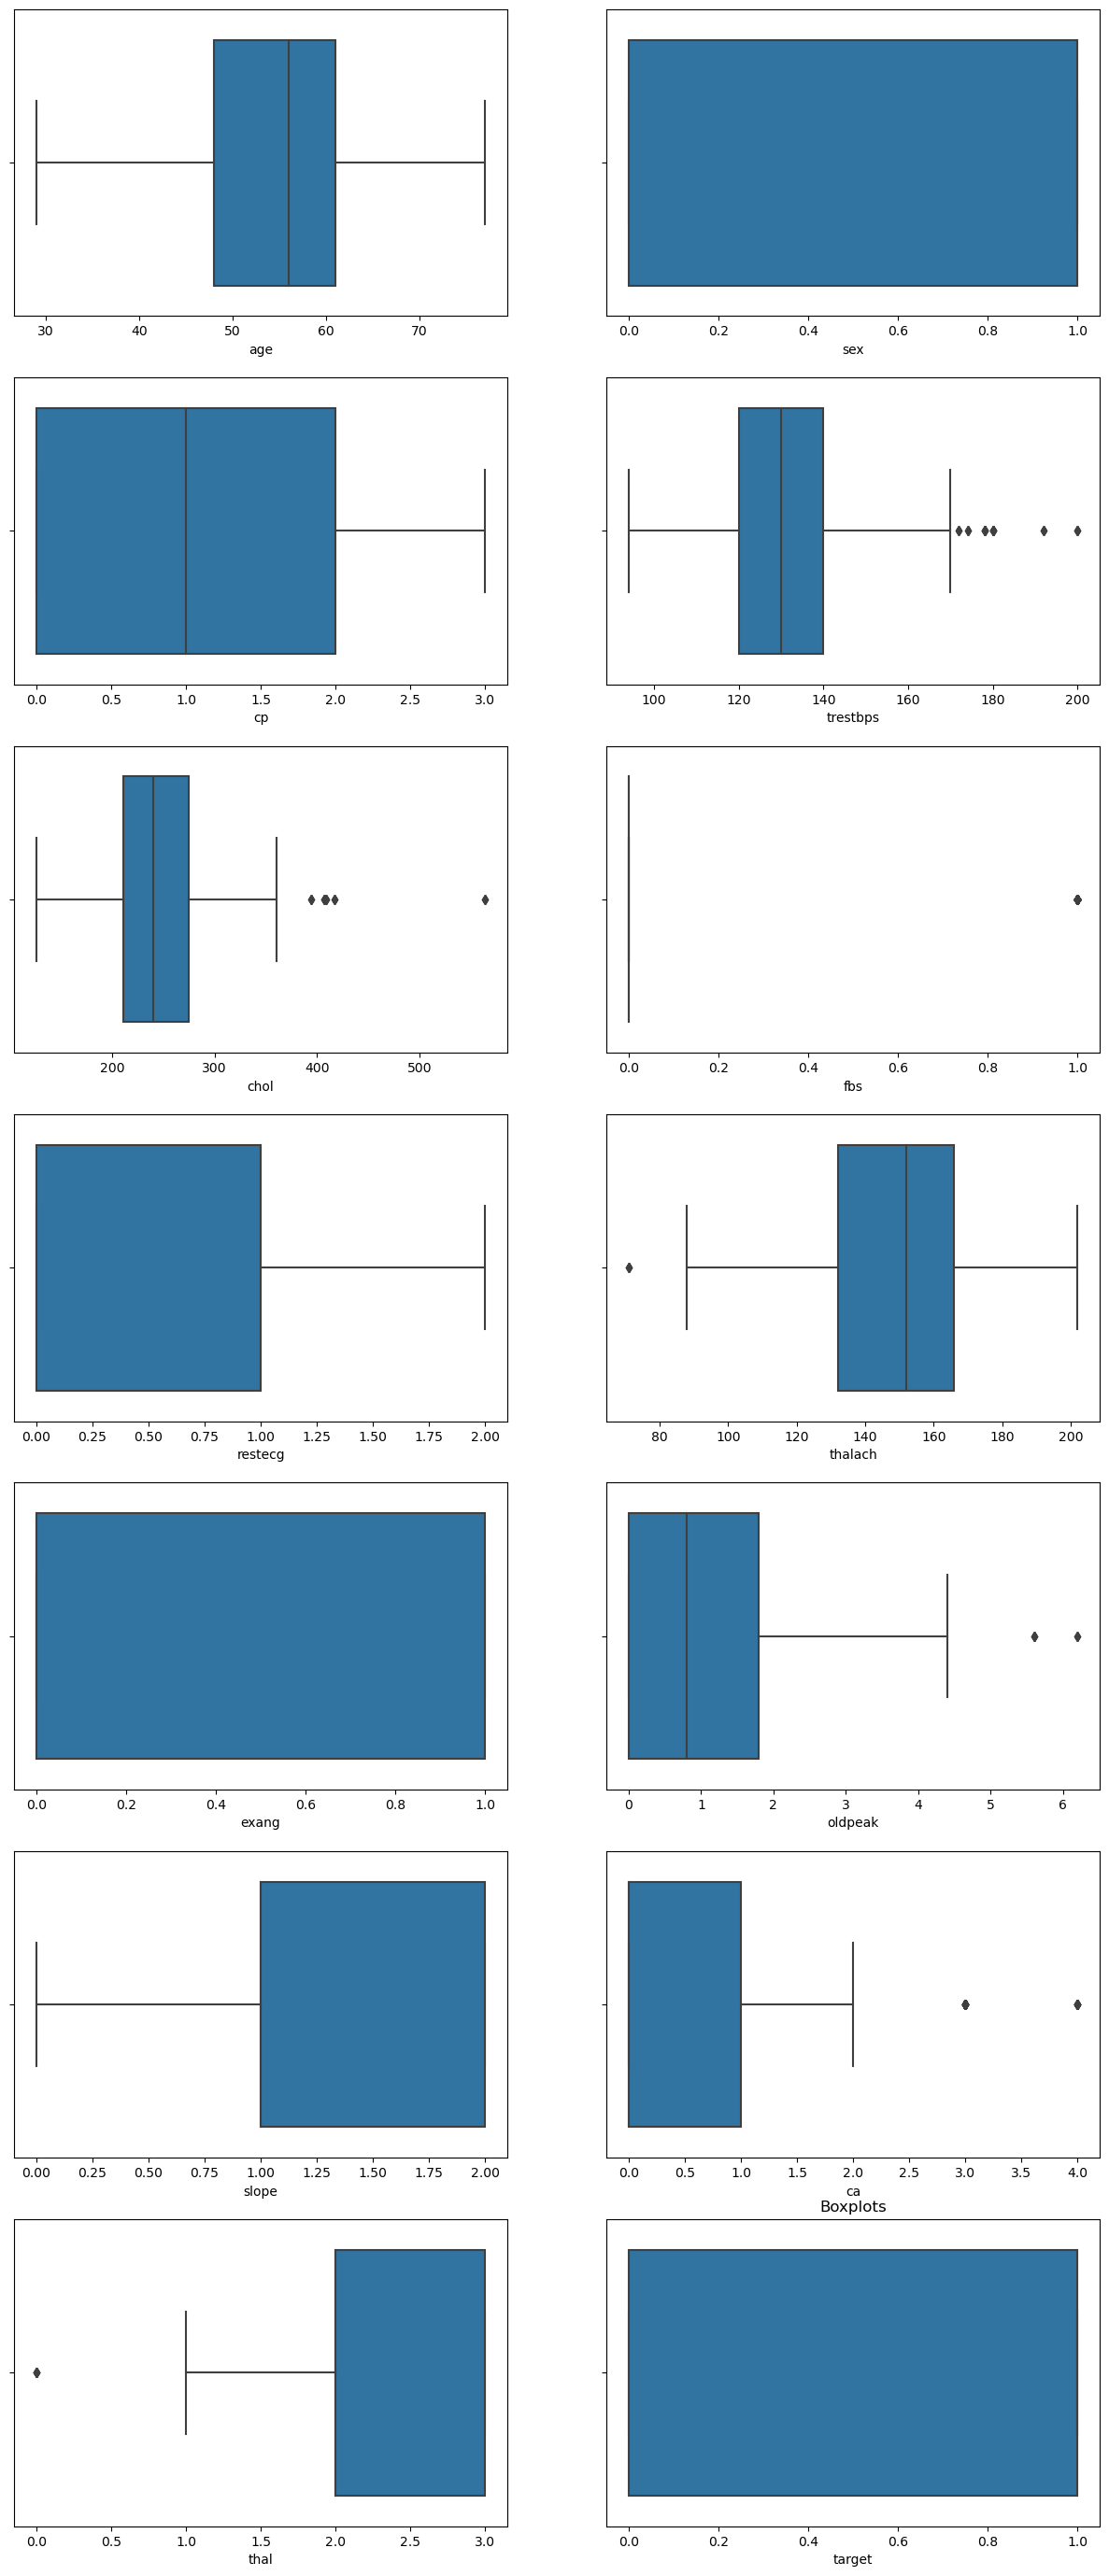

In [11]:
# Create a DataFrame 'features' by dropping the 'target' column 
# from the original DataFrame 'df'
features = df.drop('target', axis=1)

# Create a list 'features_list' containing the column names of 'features'
features_list = df.columns.tolist()

# Create a figure with a 7x2 grid of subplots and set the figure size to (15, 35)
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(15, 35))

# Iterate over each feature in 'features_list' along with its index using 'enumerate'
for i, var in enumerate(features_list):
    # Calculate the row number (0 to 6) for the current subplot
    x = i // 2
    
    # Calculate the column number (0 or 1) for the current subplot
    y = i % 2
    
    # Create a boxplot for the current feature using Seaborn's 'boxplot' function
    sns.boxplot(data=df, x=var, ax=ax[x, y])

# Set the title of the entire figure as "Boxplots"
plt.title("Boxplots")

# Display the entire figure with all the boxplots
plt.show()

### Noise Detection and Outlier Handling
Use Local Outlier Factor (LOF) to detect and handle outliers.

In [12]:
lof = LocalOutlierFactor(n_neighbors=20)
df['lof_score'] = lof.fit_predict(df.drop('target', axis=1))
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score', axis=1, inplace=True)  # Returning the data frame to the previous state

# Remove specific outliers
df = df.drop([28, 53, 85, 96, 111, 220, 246, 248, 272, 297])

Found 26 outliers at indices [101, 151, 158, 192, 246, 267, 269, 285, 296, 326, 336, 356, 378, 391, 464, 475, 559, 587, 605, 630, 682, 709, 733, 769, 964, 1014]


### Prepare Data for Modeling

Split the dataset into features (X) and the target variable (y), and then divide the data into training and testing sets.

In [13]:
# Features and target
x = df.drop('target', axis=1)
y = df['target']

# Prepare the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Display information about train and test data
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape, '\n')
print('X_train info:', X_train.info(), '\n')
print('X_test info:', X_test.info())

X_train shape: (710, 13)
X_test shape: (305, 13)
y_train shape: (710,)
y_test shape: (305,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 70 to 694
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       710 non-null    int64  
 1   sex       710 non-null    int64  
 2   cp        710 non-null    int64  
 3   trestbps  710 non-null    int64  
 4   chol      710 non-null    int64  
 5   fbs       710 non-null    int64  
 6   restecg   710 non-null    int64  
 7   thalach   710 non-null    int64  
 8   exang     710 non-null    int64  
 9   oldpeak   710 non-null    float64
 10  slope     710 non-null    int64  
 11  ca        710 non-null    int64  
 12  thal      710 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 77.7 KB
X_train info: None 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 259 to 109
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtyp

### Data Normalization

In this section, data normalization will be performed to normalize the range of independent variables or features of data.

Before applying algorithm we should check whether the data is equally splitted or not, because if data is not splitted equally it will cause for data imbalacing problem

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Lasso Regression
Train a Lasso regression model on the dataset.

In [15]:
# Create and train the Lasso regression model
LR = Lasso(alpha=0.03)
LR.fit(X_train, y_train)

Lasso(alpha=0.03)

### Model Evaluation
Evaluate the Lasso regression model using accuracy, cross-validation score, classification report, and confusion matrix.

In [16]:
# Accuracy score
y_pred = LR.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Define threshold to return discrete values
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy score:', accuracy_score)

# Cross-validation score
KF = KFold(n_splits=5, shuffle=True, random_state=0)
CVS = cross_val_score(LR, X_test, y_pred, cv=KF)
print('Cross-validation score:', CVS)

# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

# Confusion matrix
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy score: 0.8360655737704918
Cross-validation score: [0.69015015 0.71080753 0.697217   0.70107317 0.7567473 ]
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       149
           1       0.80      0.90      0.85       156

    accuracy                           0.84       305
   macro avg       0.84      0.83      0.83       305
weighted avg       0.84      0.84      0.84       305

Confusion matrix:
[[114  35]
 [ 15 141]]


### Polynomial Features
By adding polynomial features, the model may capture more complex relationships in the data, potentially leading to a higher accuracy.

In [17]:
# Import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

# Add polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the Lasso regression model with polynomial features
LR_poly = Lasso(alpha=0.03)
LR_poly.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred_poly = LR_poly.predict(X_test_poly)
y_pred_poly = (y_pred_poly > 0.5).astype(int)  # Define threshold to return discrete values

# Evaluate the model's accuracy
accuracy_score_poly = metrics.accuracy_score(y_test, y_pred_poly)
print('Accuracy score with polynomial features:', accuracy_score_poly)

# Classification report
print('Classification report with polynomial features:')
print(classification_report(y_test, y_pred_poly))

# Confusion matrix
print('Confusion matrix with polynomial features:')
print(confusion_matrix(y_test, y_pred_poly))


Accuracy score with polynomial features: 0.8590163934426229
Classification report with polynomial features:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       149
           1       0.85      0.88      0.87       156

    accuracy                           0.86       305
   macro avg       0.86      0.86      0.86       305
weighted avg       0.86      0.86      0.86       305

Confusion matrix with polynomial features:
[[124  25]
 [ 18 138]]


Great! Achieving an accuracy of 86% is a positive improvement. 

### Conclusion

In this notebook, we explored the Heart Disease UCI dataset, performed data exploration, handled outliers using LOF, and trained a Lasso regression model for heart disease prediction. The model was evaluated using various metrics, providing insights into its performance.

Feel free to fork and explore the notebook further or experiment with different models and techniques!
